In [7]:
import torch
def format_pytorch_version(version):
  return version.split('+')[0]
TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
def format_cuda_version(version):
  return 'cu' + version.replace('.', '')
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)
!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 
!pip install pyg
import os.path as osp
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GATConv
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html


In [8]:
#@title Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=T.NormalizeFeatures())
data = dataset[0]

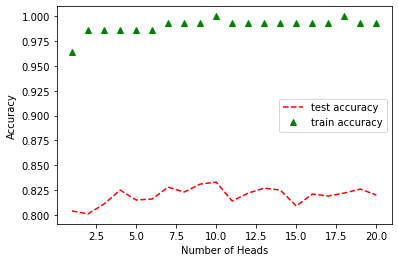

In [9]:
class Net(torch.nn.Module):
    def __init__(self, in_channels, out_channels, headsIn):
        super().__init__()

        self.conv1 = GATConv(in_channels, 8, heads=headsIn, dropout=0.6)
        self.conv2 = GATConv(headsIn * 8, out_channels, heads=1, concat=False,
                             dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=-1)




def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


@torch.no_grad()
def test(data):
    model.eval()
    out, accs = model(data.x, data.edge_index), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        acc = float((out[mask].argmax(-1) == data.y[mask]).sum() / mask.sum())
        accs.append(acc)
    return accs


test_accuracies = []
train_accuracies = []
for i in range(1, 21):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = Net(dataset.num_features, dataset.num_classes, i).to(device)
  data = data.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.0005)
  for epoch in range(1, 201):
    train(data)
    train_acc, val_acc, test_acc = test(data)
    #print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, 'f'Test: {test_acc:.4f}')
    if epoch == 200:
      test_accuracies.append(test_acc)
      train_accuracies.append(train_acc)
plt.plot(range(1,21), test_accuracies, 'r--', range(1,21), train_accuracies, 'g^')
plt.xlabel('Number of Heads')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.show()

In [10]:
#@title Citeseer Dataset
dataset = 'Citeseer'
dataset = Planetoid(root='/tmp/Citeseer', name=dataset, transform=T.NormalizeFeatures())
data = dataset[0]

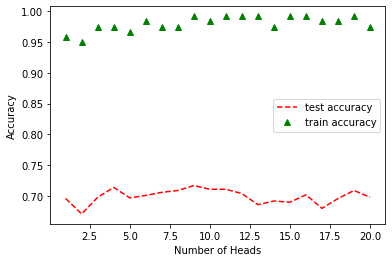

In [11]:
class Net(torch.nn.Module):
    def __init__(self, in_channels, out_channels, headsIn):
        super().__init__()

        self.conv1 = GATConv(in_channels, 8, heads=headsIn, dropout=0.6)
        self.conv2 = GATConv(headsIn * 8, out_channels, heads=1, concat=False,
                             dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=-1)




def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


@torch.no_grad()
def test(data):
    model.eval()
    out, accs = model(data.x, data.edge_index), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        acc = float((out[mask].argmax(-1) == data.y[mask]).sum() / mask.sum())
        accs.append(acc)
    return accs


test_accuracies = []
train_accuracies = []
for i in range(1, 21):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = Net(dataset.num_features, dataset.num_classes, i).to(device)
  data = data.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.0005)
  for epoch in range(1, 201):
    train(data)
    train_acc, val_acc, test_acc = test(data)
    #print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, 'f'Test: {test_acc:.4f}')
    if epoch == 200:
      test_accuracies.append(test_acc)
      train_accuracies.append(train_acc)
plt.plot(range(1,21), test_accuracies, 'r--', range(1,21), train_accuracies, 'g^')
plt.xlabel('Number of Heads')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.show()

In [5]:
#@title Pubmed Dataset
dataset = 'Pubmed'
dataset = Planetoid(root='/tmp/Pubmed', name = dataset, transform=T.NormalizeFeatures())
data = dataset[0]

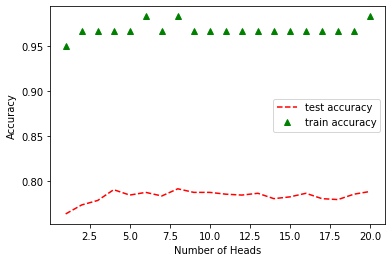

In [6]:
class Net(torch.nn.Module):
    def __init__(self, in_channels, out_channels, headsIn):
        super().__init__()

        self.conv1 = GATConv(in_channels, 8, heads=headsIn, dropout=0.6)
        self.conv2 = GATConv(headsIn * 8, out_channels, heads=8, concat=False,
                             dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=-1)




def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()


@torch.no_grad()
def test(data):
    model.eval()
    out, accs = model(data.x, data.edge_index), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        acc = float((out[mask].argmax(-1) == data.y[mask]).sum() / mask.sum())
        accs.append(acc)
    return accs


test_accuracies = []
train_accuracies = []
for i in range(1, 21):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = Net(dataset.num_features, dataset.num_classes, i).to(device)
  data = data.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)
  for epoch in range(1, 201):
    train(data)
    train_acc, val_acc, test_acc = test(data)
    #print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, 'f'Test: {test_acc:.4f}')
    if epoch == 200:
      test_accuracies.append(test_acc)
      train_accuracies.append(train_acc)
plt.plot(range(1,21), test_accuracies, 'r--', range(1,21), train_accuracies, 'g^')
plt.xlabel('Number of Heads')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.show()